<a href="https://colab.research.google.com/github/moridin04/CCADMACL-Research/blob/main/Copy_of_PCA_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Principal Component Analysis

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA

## Step 1: Load the dataset

In [92]:
cfd = pd.read_csv('creditcard.csv')

X = cfd.drop('Class', axis=1)
y = cfd['Class']

feature_names = X.columns

This dataset is made of 30 features/dimensions: Time, V1-V28, Amount

In [93]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


## Step 2: Use PCA to for reduce the dimensions

Dimensions of iris data set before PCA

In [94]:
X.shape

(284807, 30)

We use PCA to project this 4 feature space into a 2-dimensional space.

In [95]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_scaled = StandardScaler().fit_transform(X_imputed)

pca = PCA(n_components=10)
X_principal = pca.fit_transform(X_scaled)

Dimensions of iris data set after PCA

In [96]:
X_principal.shape

(284807, 10)

## Step 3: Display the explained variances of each principal component using a Scree Plot

In [97]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)

PC4_explainedvariance = explained_variance[3]
print("Explained variance of PC4", PC4_explainedvariance)

PC5_explainedvariance = explained_variance[4]
print("Explained variance of PC5", PC5_explainedvariance)

PC6_explainedvariance = explained_variance[5]
print("Explained variance of PC6", PC6_explainedvariance)

PC7_explainedvariance = explained_variance[6]
print("Explained variance of PC7", PC7_explainedvariance)

PC8_explainedvariance = explained_variance[7]
print("Explained variance of PC8", PC8_explainedvariance)

PC9_explainedvariance = explained_variance[8]
print("Explained variance of PC9", PC9_explainedvariance)

PC10_explainedvariance = explained_variance[9]
print("Explained variance of PC10", PC10_explainedvariance)

Explained variance of PC1 0.06527521274102722
Explained variance of PC2 0.05612313303362721
Explained variance of PC3 0.033333333333334055
Explained variance of PC4 0.033333333333333624
Explained variance of PC5 0.03333333333333351
Explained variance of PC6 0.033333333333333486
Explained variance of PC7 0.033333333333333465
Explained variance of PC8 0.03333333333333342
Explained variance of PC9 0.033333333333333416
Explained variance of PC10 0.0333333333333334


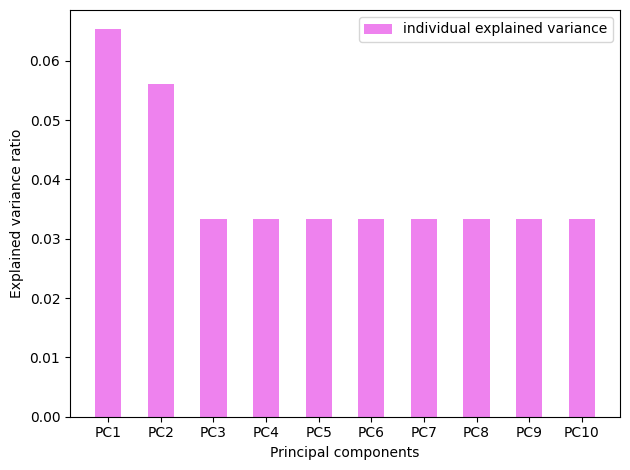

In [98]:
plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

## Step 4: Plot the features after doing PCA

In [99]:
PC_df = pd.DataFrame({'PC1': X_principal[:, 0], 'PC2': X_principal[:, 1], 'PC3': X_principal[:, 2],
                      'PC4': X_principal[:, 3], 'PC5': X_principal[:, 4], 'PC6': X_principal[:, 5],
                      'PC7': X_principal[:, 6], 'PC8': X_principal[:, 7], 'PC9': X_principal[:, 8], 'PC10': X_principal[:, 9]})
PC_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.416630,-2.532664,0.610384,0.333856,0.389871,-0.185773,0.789836,0.835010,-0.807475,0.508153
1,-0.393453,-2.077326,0.600515,0.073773,-0.418495,-0.215120,0.656130,-0.793803,0.382103,-0.327869
2,1.868525,-2.533497,-0.055197,1.257310,1.363593,-1.925472,2.081274,-0.695225,-0.058073,-0.967450
3,0.315744,-1.783506,-0.207880,2.792977,-0.519036,-0.547818,-0.210795,0.708673,-0.831208,-1.176140
4,-0.004379,-1.488415,-0.487332,0.070169,0.405306,0.278263,-0.321165,0.823956,-0.833559,-0.265499


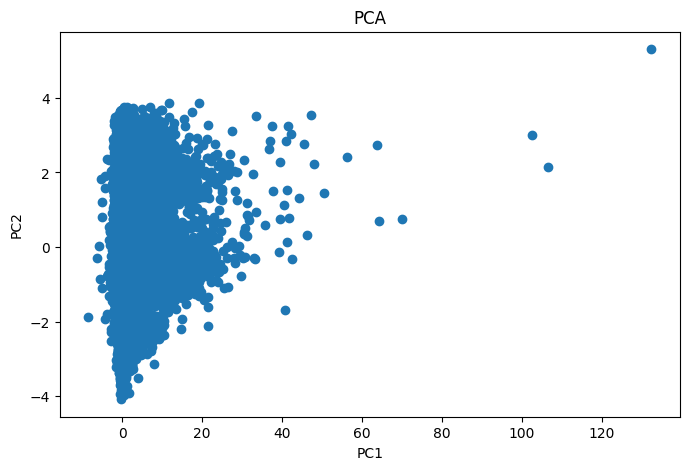

In [100]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC1'], PC_df['PC2'])
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

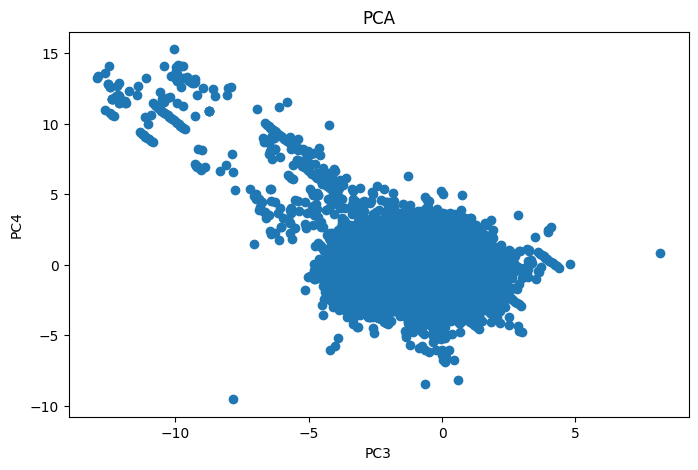

In [101]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC3'], PC_df['PC4'])
plt.title('PCA')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()

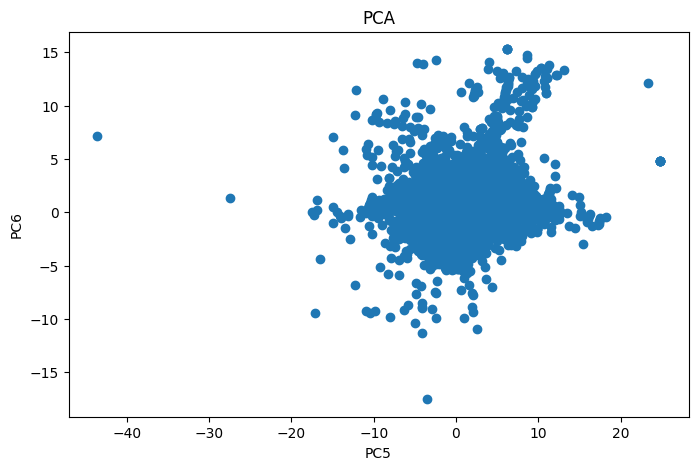

In [102]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC5'], PC_df['PC6'])
plt.title('PCA')
plt.xlabel('PC5')
plt.ylabel('PC6')
plt.show()

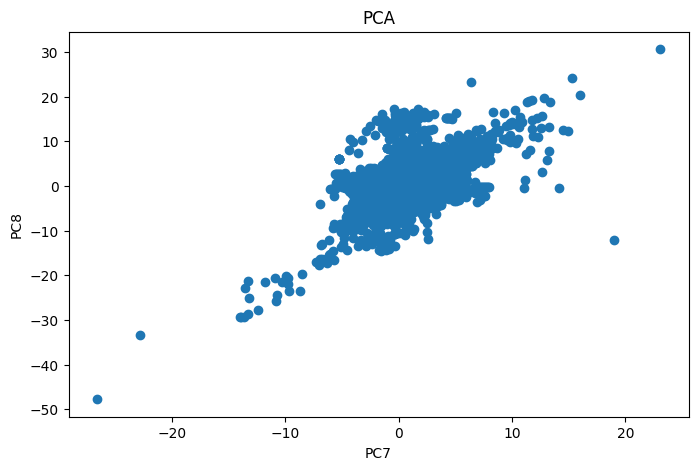

In [103]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC7'], PC_df['PC8'])
plt.title('PCA')
plt.xlabel('PC7')
plt.ylabel('PC8')
plt.show()

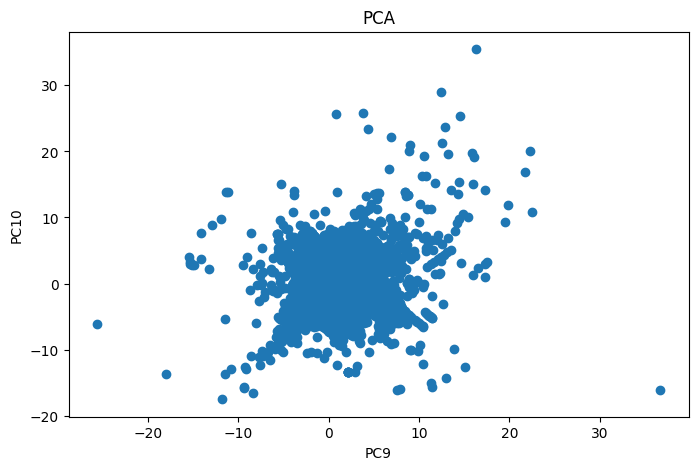

In [104]:
plt.figure(figsize=(8,5))
plt.scatter(PC_df['PC9'], PC_df['PC10'])
plt.title('PCA')
plt.xlabel('PC9')
plt.ylabel('PC10')
plt.show()

## Step 5: Get the loadings

Each feature will get a weight or loading that indicate the how much it contributes to a specific principal component (PC)

In [105]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=feature_names)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Time,-0.041487,0.916694,-6.681975e-15,-7.439344e-16,-1.298341e-15,1.387358e-15,0.000000e+00,-1.713402e-15,-0.000000e+00,-0.000000e+00
V1,-0.240066,0.146563,-2.852111e-02,-2.768394e-02,-6.064518e-02,-9.291965e-02,-7.164892e-02,-2.054454e-01,-3.548034e-02,1.322348e-02
V2,-0.547927,-0.039505,-9.694436e-03,9.660790e-02,5.253337e-02,-7.453011e-03,-3.820958e-02,2.073982e-02,-1.227305e-01,5.469549e-02
V3,-0.199450,-0.572663,1.330933e-01,4.174496e-02,-7.062988e-03,-2.394791e-01,-9.935503e-02,2.378927e-01,-1.687161e-01,-1.276967e-01
V4,0.106443,-0.136432,3.784144e-02,5.495074e-02,5.968516e-02,-5.120088e-02,-8.794517e-02,1.848434e-01,-1.322960e-01,2.239411e-01
V5,-0.406192,0.213659,-4.033350e-02,-2.931845e-02,-8.504167e-02,-1.817505e-02,1.386805e-01,-1.901549e-01,1.207127e-01,-8.461030e-02
V6,0.225609,-0.074209,4.239558e-02,7.499975e-03,-3.348581e-02,-1.445801e-01,-1.531072e-02,-1.587670e-02,-5.903053e-02,-3.596892e-01
V7,0.406337,0.132502,-2.126859e-03,-2.066383e-02,-9.798615e-02,-8.240251e-02,4.439388e-02,-2.481725e-01,-2.811302e-02,9.676006e-02
V8,-0.104772,-0.054449,1.865773e-02,3.003415e-02,-7.626203e-03,-4.250462e-02,5.048276e-02,1.130860e-01,3.056231e-02,1.071409e-01
V9,-0.045284,-0.013718,-7.729405e-02,-4.887201e-02,-3.295141e-02,-9.943468e-02,-2.846715e-01,-6.583983e-02,2.695905e-02,4.808584e-01


In [106]:
loadings = pd.DataFrame(
    pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)
print(loadings['PC1'].sort_values(ascending=False).head(5))


Amount    0.988870
V7        0.406337
V20       0.352449
V6        0.225609
V21       0.107448
Name: PC1, dtype: float64


## Step 6: Use a clustering algorithm

In [85]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,
                  n_init = 10, random_state = 0)
kmeans.fit(PC_df)
labels = kmeans.labels_  # Cluster labels for each point
centroids = kmeans.cluster_centers_  # Cluster centroids

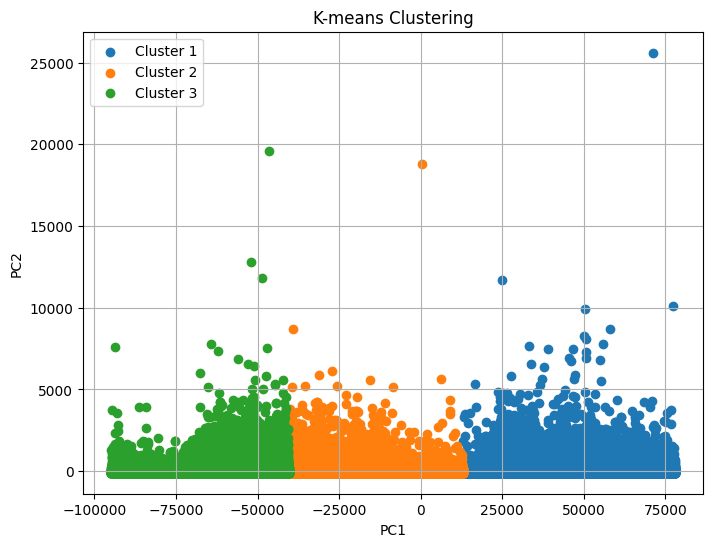

In [86]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

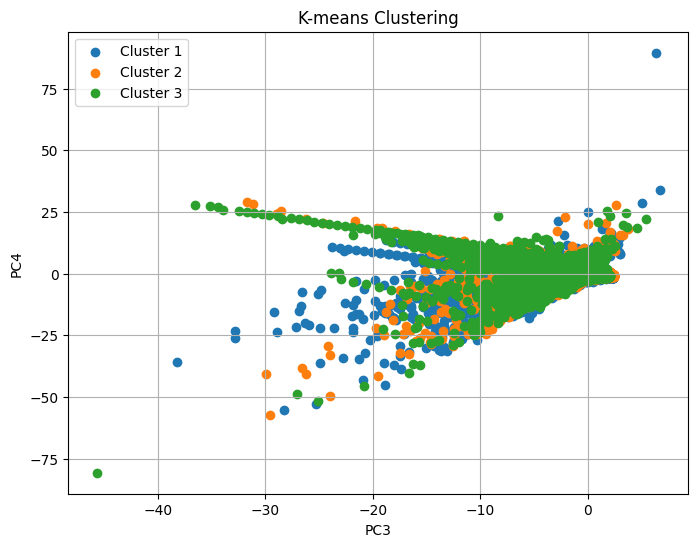

In [87]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 2], cluster_points[:, 3],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.legend()
plt.grid(True)
plt.show()

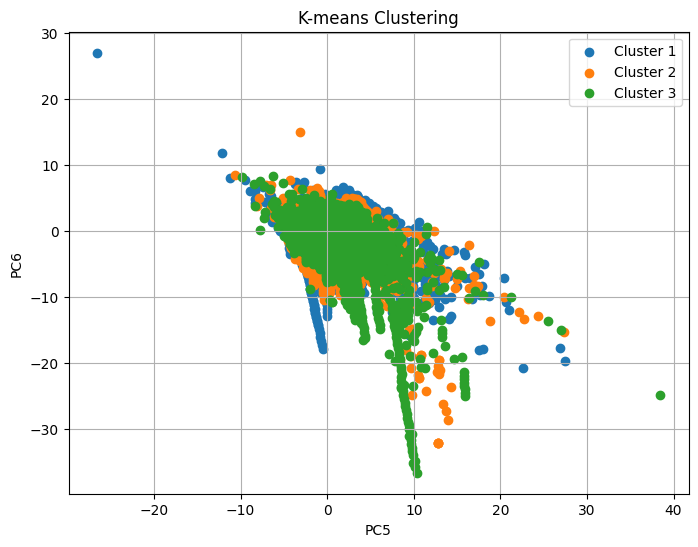

In [88]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 4], cluster_points[:, 5],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC5')
plt.ylabel('PC6')
plt.legend()
plt.grid(True)
plt.show()

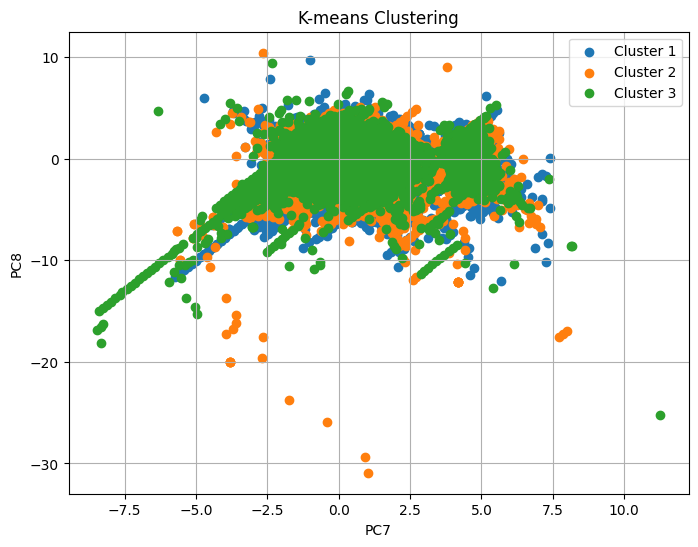

In [89]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 6], cluster_points[:, 7],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC7')
plt.ylabel('PC8')
plt.legend()
plt.grid(True)
plt.show()

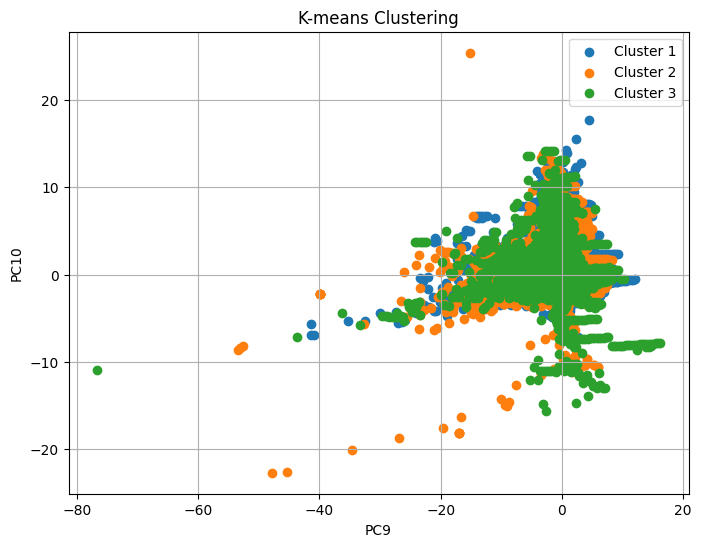

In [90]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 8], cluster_points[:, 9],
                label=f'Cluster {i + 1}')

# Plot centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC9')
plt.ylabel('PC10')
plt.legend()
plt.grid(True)
plt.show()